In [1]:
%matplotlib inline



Logistic Regression Example
===========================

Comparison of scaling.



2500
5000
7500
10000


/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


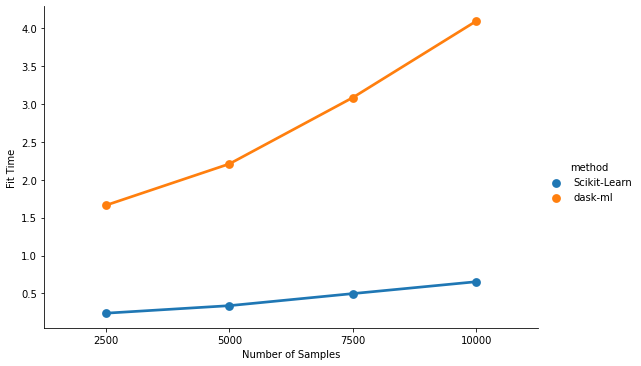

In [2]:
from dask_ml.datasets import make_classification
import pandas as pd

from timeit import default_timer as tic
import sklearn.linear_model
import dask_ml.linear_model
import seaborn as sns

Ns = [2500, 5000, 7500, 10000]

timings = []

for n in Ns:
    print(n)
    X, y = make_classification(n_samples=n, n_features=1_000, random_state=n, chunks=n)
    t1 = tic()
    sklearn.linear_model.LogisticRegression().fit(X, y)
    timings.append(('Scikit-Learn', n, tic() - t1))
    t1 = tic()
    dask_ml.linear_model.LogisticRegression().fit(X, y)
    timings.append(('dask-ml', n, tic() - t1))


df = pd.DataFrame(timings, columns=['method', 'Number of Samples', 'Fit Time'])
sns.factorplot(x='Number of Samples', y='Fit Time', hue='method',
               data=df, aspect=1.5)